In [1]:
import numpy as np
import pandas as pd
import re
import spacy
import warnings
from nltk.corpus import stopwords
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud ,STOPWORDS
stopword=set(STOPWORDS)
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train = pd.read_csv("C:/Users/setuc/Insofe internship/Preprocessed_train_data1.csv")
test = pd.read_csv("c:/users/setuc/Insofe internship/Preprocessed_train_data1.csv")

In [10]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [8]:
train = train.drop(['Unnamed: 0','comment_length'], axis=1)

In [9]:
train.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,no he did not read it again i would have thoug...,0,0,0,0,0,0
159562,ffd72e9766c09c97,auto guides and the motoring press are not goo...,0,0,0,0,0,0
159563,ffe029a7c79dc7fe,please identify what part of blp applies becau...,0,0,0,0,0,0
159564,ffe897e7f7182c90,catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,the numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,and i really do not think you understand i cam...,0,0,0,0,0,0


In [11]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [12]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,True
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,True
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,True
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,True


In [13]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
Unnamed: 0        0
id                0
comment_text      0
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
comment_length    0
dtype: int64
filling NA with "unknown"


In [14]:
## Visualizations

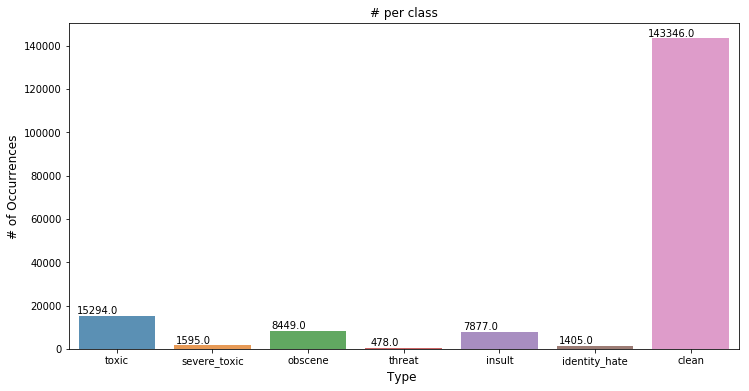

In [15]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/4, height + 8, label, ha='center', va='bottom')
    

plt.savefig('class.png')
plt.show()

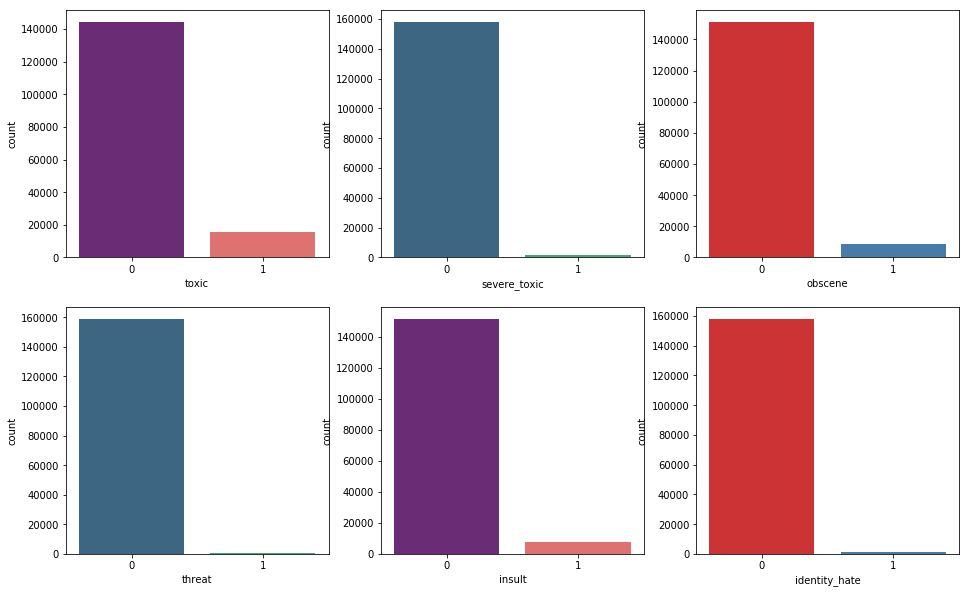

In [16]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'magma',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'Set1', ax = ax6)
plt.show()

In [17]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

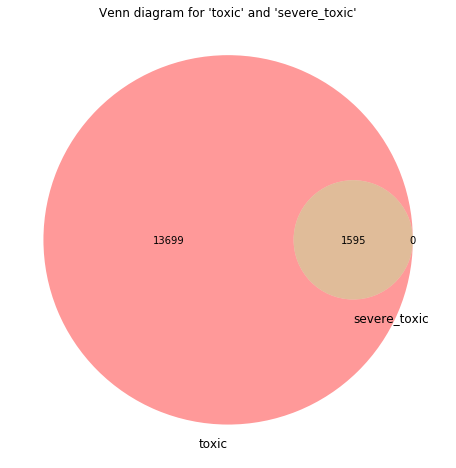

In [18]:
t = train[(train['toxic'] == 1) & (train['severe_toxic'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['severe_toxic'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()

In [19]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [20]:
print("clean:")
print(train[train.clean==1].iloc[4,1])

clean:
you sir are my hero any chance you remember what page that on


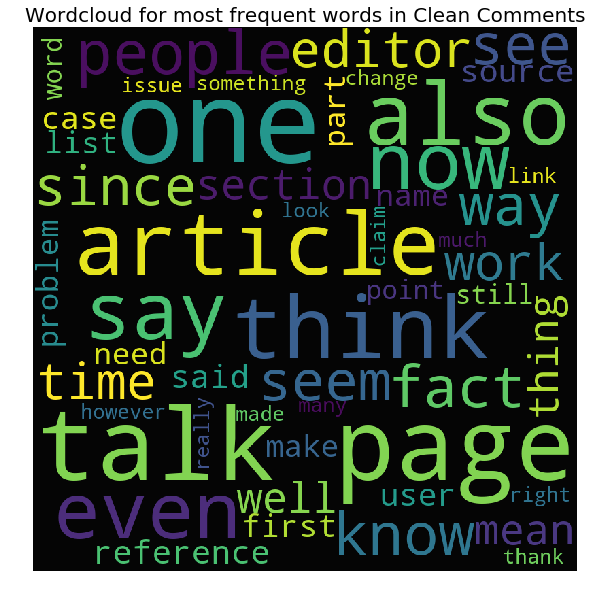

In [21]:
#clean comments
clean_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
clean_mask=clean_mask
#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=clean_mask,stopwords=stopword)
wc.generate('toxic'.join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Wordcloud for most frequent words in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

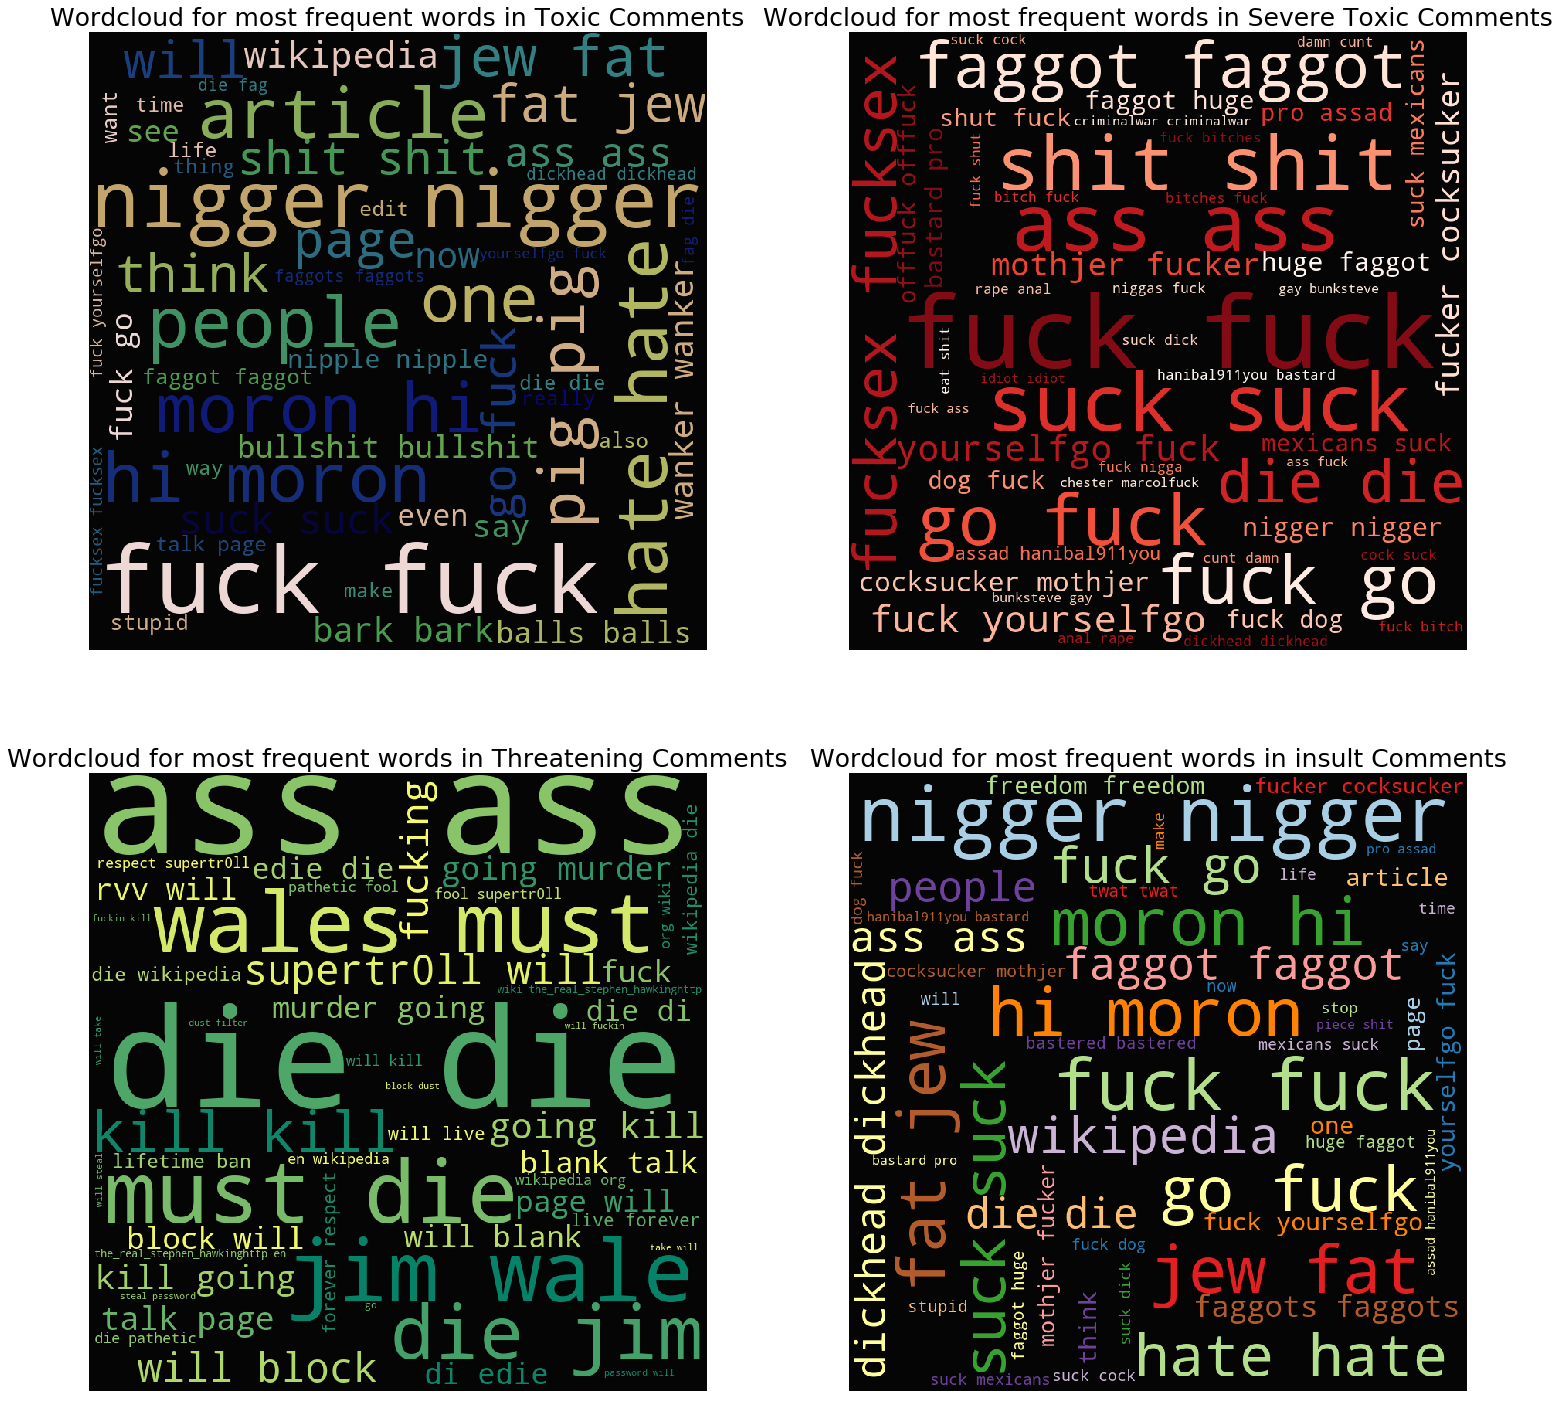

In [22]:
toxic_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
toxic_mask=toxic_mask
#wordcloud for toxic comments
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(25,25))
plt.subplot(221)
plt.axis("off")
plt.title("Wordcloud for most frequent words in Toxic Comments", fontsize=25)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
severe_toxic_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
severe_toxic_mask=severe_toxic_mask
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=severe_toxic_mask,stopwords=stopword)
wc.generate("".join(text))
plt.axis("off")
plt.title("Wordcloud for most frequent words in Severe Toxic Comments", fontsize=25)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(223)
threat_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
threat_mask=threat_mask
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=threat_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Wordcloud for most frequent words in Threatening Comments", fontsize=25)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#insult
plt.subplot(224)
insult_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
insult_mask=insult_mask
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=insult_mask,stopwords=stopword)
wc.generate("text ".join(text))
plt.axis("off")
plt.title("Wordcloud for most frequent words in insult Comments", fontsize=25)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

plt.show()

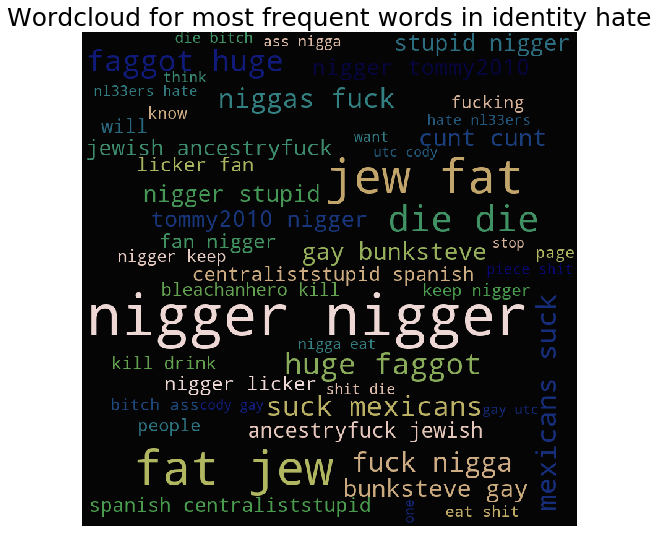

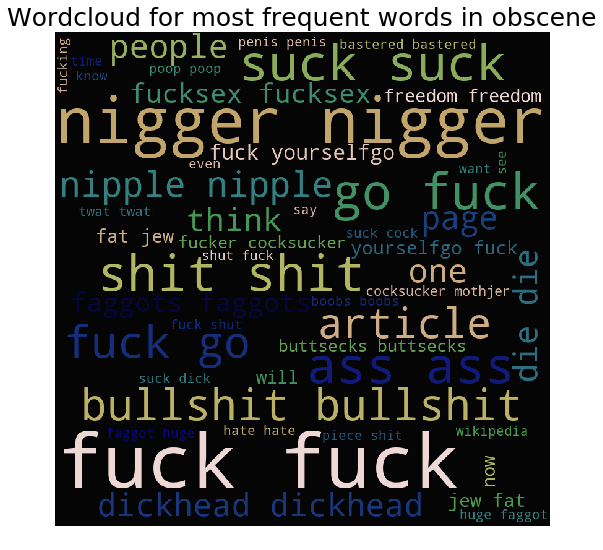

In [25]:
identity_hate_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
identity_hate_mask=identity_hate_mask
#wordcloud for identity hate comments
subset=train[train.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Wordcloud for most frequent words in identity hate", fontsize=25)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)


obscene_mask=np.array(Image.open("C:/Users/setuc/Insofe internship/socialmedia.png"))
obscene_mask=obscene_mask
#wordcloud for obscene comments
subset=train[train.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=50,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Wordcloud for most frequent words in obscene", fontsize=25)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()


plt.show()